In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import glob
import random
from math import sqrt, floor


# Tray/Ara2012

In [2]:
# read images
image1= r"C:\Users\ct\Google Drive\COMP9517_Computer Vision\project\Plant_Phenotyping_Datasets\Tray\Ara2012\*_rgb.png"
label1= r"C:\Users\ct\Google Drive\COMP9517_Computer Vision\project\Plant_Phenotyping_Datasets\Tray\Ara2012\*_fg.png"


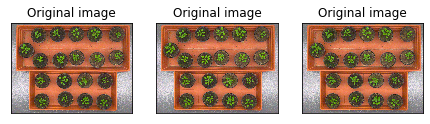

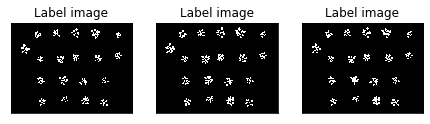

In [3]:
fig =plt.figure(figsize = (10,3))
i = 0
for file in glob.glob(image1):
    ax = fig.add_subplot(1, 4,i+1, xticks = [], yticks = [])
    i += 1
    image= cv2.imread(file) #reading file in BGR
    org_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(org_color)
    ax.set_title("Original image")
    if i == 3:
        break

fig =plt.figure(figsize = (10,3))
i = 0        
for file in glob.glob(label1):
    ax = fig.add_subplot(1, 4, i+1, xticks = [], yticks = [])
    i += 1
    label_img= cv2.imread(file)
    plt.imshow(label_img)
    ax.set_title("Label image")
    
    if i == 3:
        break

In [4]:
#to change all the images in the numpy array
img_1 = []
label_2 = []
for img in glob.glob(image1):
    image = cv2.imread(img)
    
    img_1.append(image)
    
for img in glob.glob(label1):
    image = cv2.imread(img,0)
    
    
    
    label_2.append(image)


In [5]:
print(type(img_1[0]))

<class 'numpy.ndarray'>


In [6]:
 #to create mask and change in binary
 
def create_mask(path):
    
    image = cv2.cvtColor(path, cv2.COLOR_BGR2HSV) #to change into HSV
    
   
    #Remove colour except green
    green_Min = np.array([35,30,30])
    green_Max = np.array([90,255,255])
    mask = cv2.inRange(image, green_Min, green_Max)
    
    mask_1 = cv2.bitwise_and(path, path, mask = mask)
    
    #Applying medianblur to eliminate small noise 
    mask2 = cv2.medianBlur(mask_1 , 5)
   
  
    mask2= cv2.cvtColor(mask2, cv2.COLOR_RGB2GRAY)
    
    #to convert in the binary
    
    ret, bin_img = cv2.threshold(mask2, 0, 250, cv2.THRESH_BINARY)
   
    
    return mask2, bin_img

In [7]:
#Image after mask and its binary image
img1 = []
lab= []

for img in img_1:
    m,l= create_mask(img)
    img1.append(m)
    lab.append(l)
#to remove noise   
lab2=[]   
for img in lab:
    kernel = np.ones((15,15),np.uint8)
    img=cv2.erode(img,kernel,iterations = 1)
    i = cv2.dilate(img, kernel, iterations=1)
    
    lab2.append(i)

C:\Users\ct\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys
C:\Users\ct\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


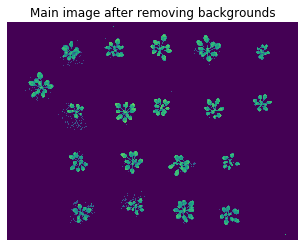

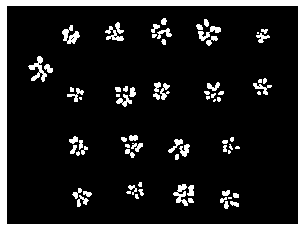

In [8]:
#mask, label = make_mask(data1[1])

p1=plt.figure(1)
plt.imshow(img1[1])
plt.axis('off')
plt.title('Main image after removing backgrounds')
p1.show()

p1=plt.figure(2)
plt.imshow(lab2[1], cmap='Greys_r')
plt.axis('off')
plt.title('Binary image')
plt.title('')
p1.show()

# Dice Similarity coefficient (DSC) and Intersection over Union (IOU) measures.

In [9]:
#calculating Dice Similarity coefficient (DSC) and Intersection over Union (IOU) measures.
def evalute(d2, data2):
    mean_iou = 0
    mean_dice = 0
    min_iou = 1
    max_iou = 0
    min_dice = 1
    max_dice = 0
    al = []
    all_dice = []
    all_iou=[]
    
    for i in range(len(d2)):
        dice = np.sum(d2[i][data2[i] == 255])*2.0 / (np.sum(d2[i]) + np.sum(data2[i])) #dice formula
        iou = np.sum(cv2.bitwise_and(d2[i], data2[i])) / np.sum(cv2.bitwise_or(d2[i], data2[i])) #iou formula
        al.append((iou,dice))
        all_dice.append(dice)
        all_iou.append(iou)
        mean_iou+= iou
        mean_dice += dice
        if iou > max_iou:
            max_iou = iou

        if iou < min_iou:
            min_iou= iou

        if dice > max_dice:
            max_dice = dice

        if dice < min_dice:
            min_dice = dice    
    
    

    mean_iou /= len(d2)
    mean_dice /= len(d2)
    
    print("\n------------------------------Dice score for all images----------------------------\n")
    print("all_dice:",all_dice)
    print("\n------------------------------IOU score for all images----------------------------\n")
    print("all_iou:",all_iou)
    print("\n------------------------------Dice similarity coefficient----------------------------\n")
    print("Mean_dice_score: ", mean_dice)
    print("Min_dice: " , min_dice)
    print("Max_dice: ", max_dice)

    
    print("\n------------------------------IOU coefficient----------------------------\n")
    print("Mean_iou_score: " , mean_iou)
    print("Min_iou: ", min_iou)
    print("Max_iou: ", max_iou)
    

In [10]:
#evaluating labels and segmentation labels dice and IOU
lab2 = np.array(lab2)
label_2 = np.array(label_2)
evalute(lab2, label_2)


------------------------------Dice score for all images----------------------------

all_dice: [0.9107278931587612, 0.9001630359636024, 0.9034884217672313, 0.9068559736585043, 0.893500986939959, 0.895529971636086, 0.8954419464870035, 0.891551565001433, 0.8879893563170085, 0.8842368325870588, 0.8821448495830726, 0.8866609260996386, 0.8876626069447822, 0.8840267822305539, 0.8779459316702806, 0.867296348314259]

------------------------------IOU score for all images----------------------------

all_iou: [0.8360885103353699, 0.8184513390602979, 0.8239661483769921, 0.8295850791899261, 0.8075027418858401, 0.810823244305382, 0.8106789350175766, 0.8043238971261532, 0.7985439360328224, 0.7924950907254719, 0.7891405691104597, 0.7963979230454915, 0.7980156133263403, 0.7921577042838934, 0.7824452996076952, 0.7656869005617746]

------------------------------Dice similarity coefficient----------------------------

Mean_dice_score:  0.8909514642724521
Min_dice:  0.867296348314259
Max_dice:  0.910727

# for Ara2013-Canon

In [11]:
image2= r"C:\Users\ct\Google Drive\COMP9517_Computer Vision\project\Plant_Phenotyping_Datasets\Tray\Ara2013-Canon\*_rgb.png"
label2= r"C:\Users\ct\Google Drive\COMP9517_Computer Vision\project\Plant_Phenotyping_Datasets\Tray\Ara2013-Canon\*_fg.png"

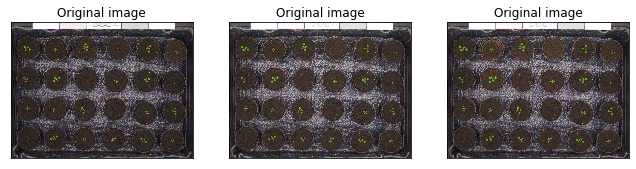

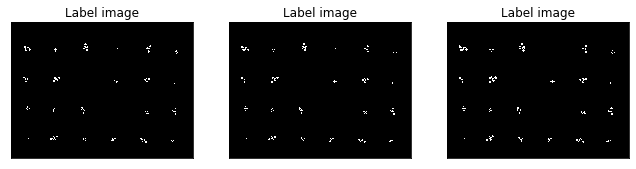

In [12]:
fig =plt.figure(figsize = (15,5))
i = 0
for file in glob.glob(image2):
    ax = fig.add_subplot(1, 4, i+1, xticks = [], yticks = [])
    i += 1
    image= cv2.imread(file)
    org_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(org_color)
    ax.set_title("Original image")
    if i == 3:
        break

fig =plt.figure(figsize = (15,5))
i = 0        
for file in glob.glob(label2):
    ax = fig.add_subplot(1, 4, i+1, xticks = [], yticks = [])
    i += 1
    label_img= cv2.imread(file)
    plt.imshow(label_img)
    ax.set_title("Label image")
    
    if i == 3:
        break

In [13]:
#to change all the images in the numpy array
img21 = []
label22 = []
for img in glob.glob(image2):
    image = cv2.imread(img)
    
    img21.append(image)
    
for img in glob.glob(label2):
    image = cv2.imread(img,0)
    
    
    label22.append(image)


In [14]:
#after segmentation label
img_21 = []
lab2= []

for img in img21:
    m,l= create_mask(img)
    img_21.append(m)
    lab2.append(l)
#to remove noise   
label_22=[]   
for img in lab2:
    kernel = np.ones((3,12),np.uint8)
    img=cv2.erode(img,kernel,iterations = 1)
    i = cv2.dilate(img, kernel, iterations=1)
    
    label_22.append(i)
    

C:\Users\ct\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys
C:\Users\ct\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


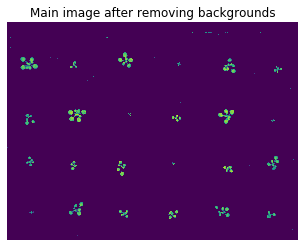

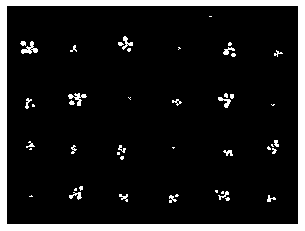

In [17]:
#mask, label = make_mask(data1[1])

p1=plt.figure(1)
plt.imshow(img_21[6])
plt.axis('off')
plt.title('Main image after removing backgrounds')
p1.show()

p1=plt.figure(2)
plt.imshow(label_22[6], cmap='Greys_r')
plt.axis('off')
plt.title('Binary image')
plt.title('')
p1.show()

In [18]:
#calculating dice Similarity coefficient and Intersection over Union (IOU).
d2 = np.array(label_22)
data2 = np.array(label22)
evalute(d2, data2)


------------------------------Dice score for all images----------------------------

all_dice: [0.8383805233165259, 0.8437347974087955, 0.8628255677837945, 0.8609083560406638, 0.853373495542008, 0.8739726658534246, 0.8800749748189419, 0.8692910182821302, 0.8830724592950853, 0.8796659585655389, 0.8822193192723299, 0.8890084766438353, 0.8895714454070203, 0.9018197849387924, 0.9074005937495442, 0.8991493365463772, 0.9079088758326607, 0.9003092579959291, 0.9013146105125928, 0.9091380363708755, 0.9069974113685255, 0.9066686789097925, 0.9171341357242934, 0.9015185334267075, 0.9132857085989505, 0.9058307344027812, 0.9061205980758068]

------------------------------IOU score for all images----------------------------

all_iou: [0.721734216879848, 0.7297069872188279, 0.7587451347303502, 0.7557849806081073, 0.744247139085099, 0.7761558173148746, 0.7858338326502351, 0.7688017273564316, 0.7906264525787957, 0.7851818529402409, 0.7892597666816079, 0.8001937530164527, 0.801106421234896, 0.8211947115